In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_csv('2017-2022.csv')


df

,Srno,Symbol,Trade,Date,Price,Ex. date,Ex. Price,% chg,Profit,% Profit,Contracts,Position value,Cum. Profit,# bars,Profit/bar,MAE,MFE,Scale In/Out
0,1,BANKNIFTY,Short,02-01-2017 09:15,18184.6,02-01-2017 10:00,18038.1,-0.81%,146.50,0.81%,1,18184.60,146.50,10,14.65,-0.35%,1.04%,0/0
1,2,BANKNIFTY,Long,02-01-2017 10:00,18026.1,02-01-2017 10:10,18020.4,-0.03%,-5.77,-0.03%,1,18026.12,140.73,3,-1.92,-0.06%,0.08%,0/0
2,3,BANKNIFTY,Short,02-01-2017 10:10,18020.4,02-01-2017 10:20,18031.7,0.06%,-11.35,-0.06%,1,18020.35,129.38,3,-3.78,-0.06%,0.07%,0/0
3,4,BANKNIFTY,Long,02-01-2017 10:20,18023.8,02-01-2017 10:30,17992.6,-0.17%,-31.22,-0.17%,1,18023.82,98.16,3,-10.41,-0.17%,0.07%,0/0
4,5,BANKNIFTY,Short,02-01-2017 10:30,18006.4,02-01-2017 11:35,17879.7,-0.70%,126.70,0.70%,1,18006.40,224.86,14,9.05,-0.10%,0.90%,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12904,12905,BANKNIFTY,Short,30-12-2022 09:15,43333.8,30-12-2022 14:05,43075.5,-0.60%,258.27,0.60%,1,43333.77,229409.18,59,4.38,-0.21%,0.79%,0/0
12905,12906,BANKNIFTY,Long,30-12-2022 14:05,43033.4,30-12-2022 15:00,43021.2,-0.03%,-12.18,-0.03%,1,43033.42,229397.00,12,-1.02,-0.05%,0.40%,0/0
12906,12907,BANKNIFTY,Short,30-12-2022 15:00,43021.2,30-12-2022 15:20,43062.1,0.10%,-40.91,-0.10%,1,43021.24,229356.09,5,-8.18,-0.36%,0.44%,0/0
12907,12908,BANKNIFTY,Long,30-12-2022 15:20,43004.6,30-12-2022 15:30,42986.4,-0.04%,-18.19,-0.04%,1,43004.64,229337.90,3,-6.06,-0.18%,0.21%,0/0


In [2]:
# Convert 'Date' and 'Ex. date' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Ex. date'] = pd.to_datetime(df['Ex. date'], dayfirst=True)

# Now you can filter out trades with entry and exit on different dates
df_filtered = df[df['Date'].dt.date == df['Ex. date'].dt.date]

# Function to calculate long profits for a group
def long_profit(group):
    return group.loc[group['Trade'] == 'Long', 'Profit'].sum()

# Function to calculate short profits for a group
def short_profit(group):
    return group.loc[group['Trade'] == 'Short', 'Profit'].sum()




df = df_filtered

In [3]:
# Aggregate the data by date
aggregated_data = df.groupby(df['Date'].dt.date).agg(
    total_profit=('Profit', 'sum'),
    number_of_trades=('Srno', 'count'),
    long_trades=('Trade', lambda x: (x == 'Long').sum()),
    short_trades=('Trade', lambda x: (x == 'Short').sum()),
    long_profit=('Profit', lambda x: long_profit(df.loc[x.index])),
    short_profit=('Profit', lambda x: short_profit(df.loc[x.index]))


).reset_index()

# Convert the 'date' column back to datetime if needed (depends on your further processing needs)
# Rename the 'Date' column to 'date' after reset_index
aggregated_data.rename(columns={'Date': 'date'}, inplace=True)
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])




# Sort the DataFrame by date to ensure cumulative calculation is correct
aggregated_data.sort_values('date', inplace=True)

# Calculate cumulative profit
aggregated_data['cumulative_profit'] = aggregated_data['total_profit'].cumsum()


# Display the updated DataFrame
print(aggregated_data.head())


        date  total_profit  number_of_trades  long_trades  short_trades  \
0 2017-01-02        377.72                 9            4             5   
1 2017-01-03        313.86                 5            3             2   
2 2017-01-04         51.89                11            6             5   
3 2017-01-05         -7.38                 9            4             5   
4 2017-01-06         30.31                 1            0             1   

   long_profit  short_profit  cumulative_profit  
0        83.51        294.21             377.72  
1       252.58         61.28             691.58  
2       -20.58         72.47             743.47  
3        12.32        -19.70             736.09  
4         0.00         30.31             766.40  


In [4]:
# Save the entire aggregated_data DataFrame into a CSV file
import pandas as pd

# Assuming 'aggregated_data' is your DataFrame

# Convert 'date' column to datetime format
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])

# Set the 'date' column as the index of the DataFrame
aggregated_data.set_index('date', inplace=True)

# Verify the index has been set to DatetimeIndex
print(aggregated_data.index)

aggregated_data.to_csv('aggregated_data.csv')


DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-16', '2017-01-17',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)


In [5]:
print(aggregated_data.columns)


Index(['total_profit', 'number_of_trades', 'long_trades', 'short_trades',
       'long_profit', 'short_profit', 'cumulative_profit'],
      dtype='object')


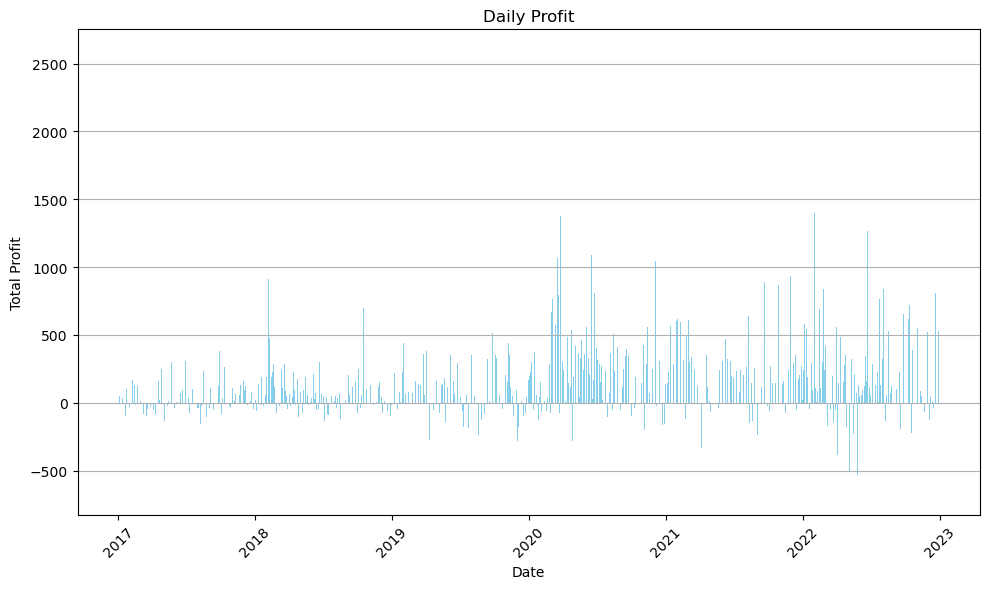

In [6]:
import matplotlib.pyplot as plt

# Since 'Date' is the index, we use it directly for the x-axis
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data.index, aggregated_data['total_profit'], color='skyblue')
plt.title('Daily Profit')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.grid(axis='y')

plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()


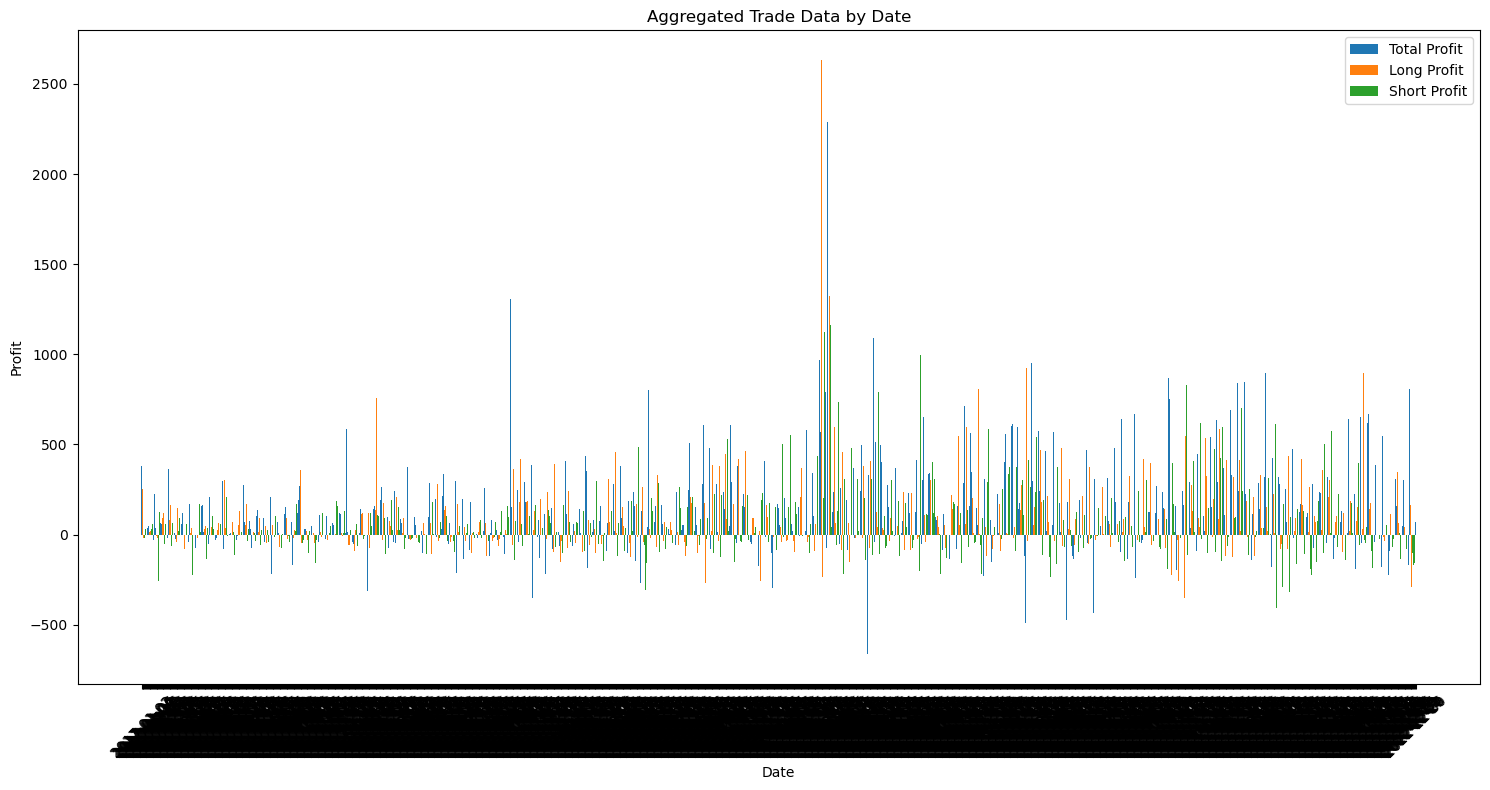

In [7]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 8))
width = 0.3  # bar width
dates = range(len(aggregated_data.index))  # numeric x-axis to place the bars

# Plotting
ax.bar([date - width for date in dates], aggregated_data['total_profit'], width=width, label='Total Profit')
ax.bar(dates, aggregated_data['long_profit'], width=width, label='Long Profit')
ax.bar([date + width for date in dates], aggregated_data['short_profit'], width=width, label='Short Profit')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title('Aggregated Trade Data by Date')
ax.set_xticks(dates)

# Correcting the setting of x-tick labels using the DataFrame's index
date_labels = aggregated_data.index.strftime('%Y-%m-%d')
ax.set_xticklabels(date_labels, rotation=45)

ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


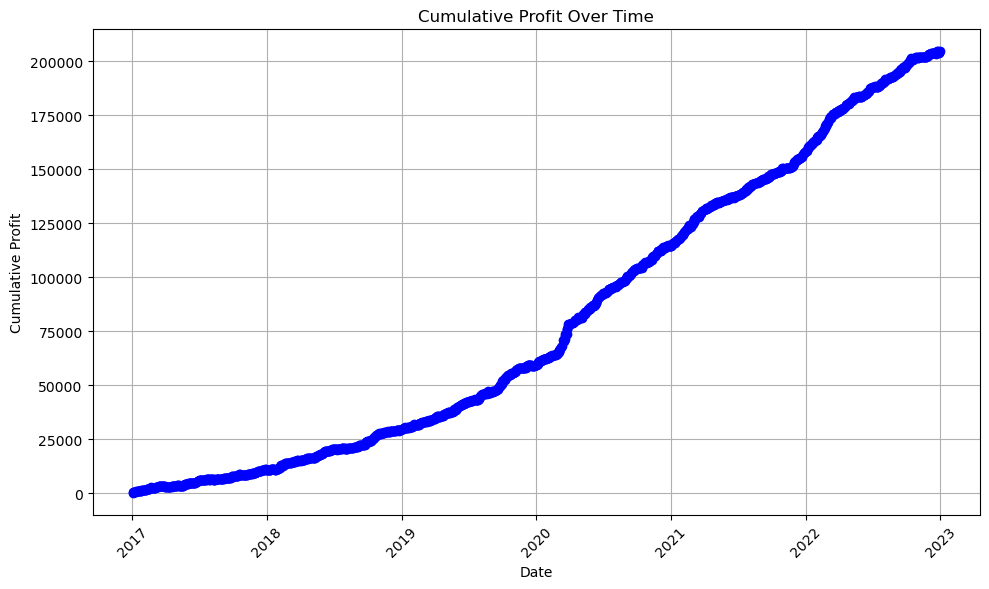

In [8]:
import matplotlib.pyplot as plt

# Plotting the cumulative profit over time
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['cumulative_profit'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Show the plot
plt.show()


In [9]:
# Calculate the correlation matrix for the specified columns
correlation_matrix = aggregated_data[['total_profit', 'number_of_trades', 'long_trades', 'short_trades', 'long_profit', 'short_profit']].corr()

# Display the correlation matrix
print(correlation_matrix)


                  total_profit  number_of_trades  long_trades  short_trades  \
total_profit          1.000000         -0.280143    -0.264801     -0.290306   
number_of_trades     -0.280143          1.000000     0.990622      0.990123   
long_trades          -0.264801          0.990622     1.000000      0.961722   
short_trades         -0.290306          0.990123     0.961722      1.000000   
long_profit           0.692075         -0.148749    -0.148998     -0.145280   
short_profit          0.652739         -0.230185    -0.208763     -0.247811   

                  long_profit  short_profit  
total_profit         0.692075      0.652739  
number_of_trades    -0.148749     -0.230185  
long_trades         -0.148998     -0.208763  
short_trades        -0.145280     -0.247811  
long_profit          1.000000     -0.095092  
short_profit        -0.095092      1.000000  


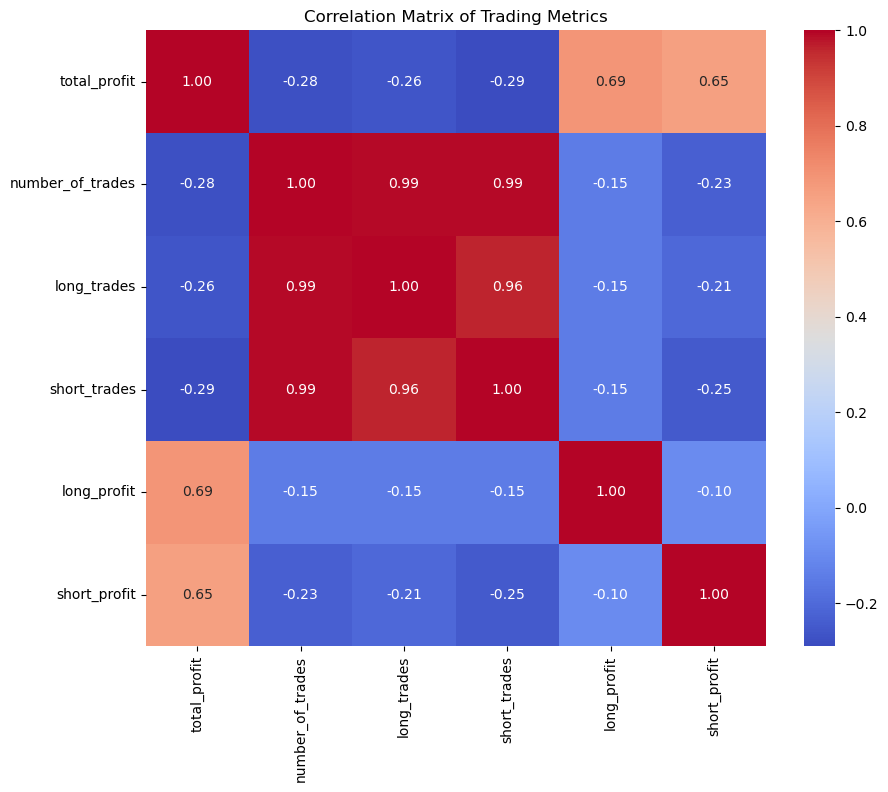

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trading Metrics')
plt.show()


In [11]:
# Filter for dates where either long_profit or short_profit is < 0 AND total_profit > 0
filtered_dates = aggregated_data[(aggregated_data['total_profit'] > 0) & ( (aggregated_data['short_profit'] < 0))]

# Display the filtered DataFrame
print(filtered_dates)


            total_profit  number_of_trades  long_trades  short_trades  \
date                                                                    
2017-01-11        212.14                13            6             7   
2017-01-16         45.16                 7            3             4   
2017-01-25        222.72                 8            4             4   
2017-01-27         35.86                16            8             8   
2017-02-03         15.04                 9            4             5   
...                  ...               ...          ...           ...   
2022-11-24         83.10                11            5             6   
2022-12-08         49.35                 9            4             5   
2022-12-13          3.50                 9            4             5   
2022-12-26        242.69                14            7             7   
2022-12-29        528.23                 7            4             3   

            long_profit  short_profit  cumulative_

In [12]:
# Filter for rows where total_profit is greater than 0
profitable_dates = aggregated_data[aggregated_data['total_profit'] < 0]

# Display the filtered DataFrame
print(profitable_dates)


            total_profit  number_of_trades  long_trades  short_trades  \
date                                                                    
2017-01-05         -7.38                 9            4             5   
2017-01-10        -56.98                 3            1             2   
2017-01-20        -95.84                11            6             5   
2017-01-24        -30.85                12            6             6   
2017-01-31        -34.98                19           10             9   
...                  ...               ...          ...           ...   
2022-12-16        -42.21                 5            3             2   
2022-12-20       -168.63                 7            3             4   
2022-12-23       -269.84                14            8             6   
2022-12-27       -222.03                 3            1             2   
2022-12-28       -380.73                22           11            11   

            long_profit  short_profit  cumulative_

In [13]:
# Filter for rows where number_of_trades is greater than 10 AND total_profit is greater than 0
filtered_rows = aggregated_data[(aggregated_data['number_of_trades'] > 10) ]

# Display the filtered DataFrame
print(filtered_rows)


            total_profit  number_of_trades  long_trades  short_trades  \
date                                                                    
2017-01-04         51.89                11            6             5   
2017-01-11        212.14                13            6             7   
2017-01-20        -95.84                11            6             5   
2017-01-24        -30.85                12            6             6   
2017-01-27         35.86                16            8             8   
...                  ...               ...          ...           ...   
2022-12-14        -36.45                12            6             6   
2022-12-15       -242.33                11            6             5   
2022-12-23       -269.84                14            8             6   
2022-12-26        242.69                14            7             7   
2022-12-28       -380.73                22           11            11   

            long_profit  short_profit  cumulative_

In [14]:
# Filter for rows where total_profit is greater than 200
high_profit_dates = aggregated_data[aggregated_data['total_profit'] > 0]
print(high_profit_dates)

            total_profit  number_of_trades  long_trades  short_trades  \
date                                                                    
2017-01-02        377.72                 9            4             5   
2017-01-03        313.86                 5            3             2   
2017-01-04         51.89                11            6             5   
2017-01-06         30.31                 1            0             1   
2017-01-11        212.14                13            6             7   
...                  ...               ...          ...           ...   
2022-12-21        806.60                 4            2             2   
2022-12-22        243.68                 6            3             3   
2022-12-26        242.69                14            7             7   
2022-12-29        528.23                 7            4             3   
2022-12-30         68.59                 6            3             2   

            long_profit  short_profit  cumulative_

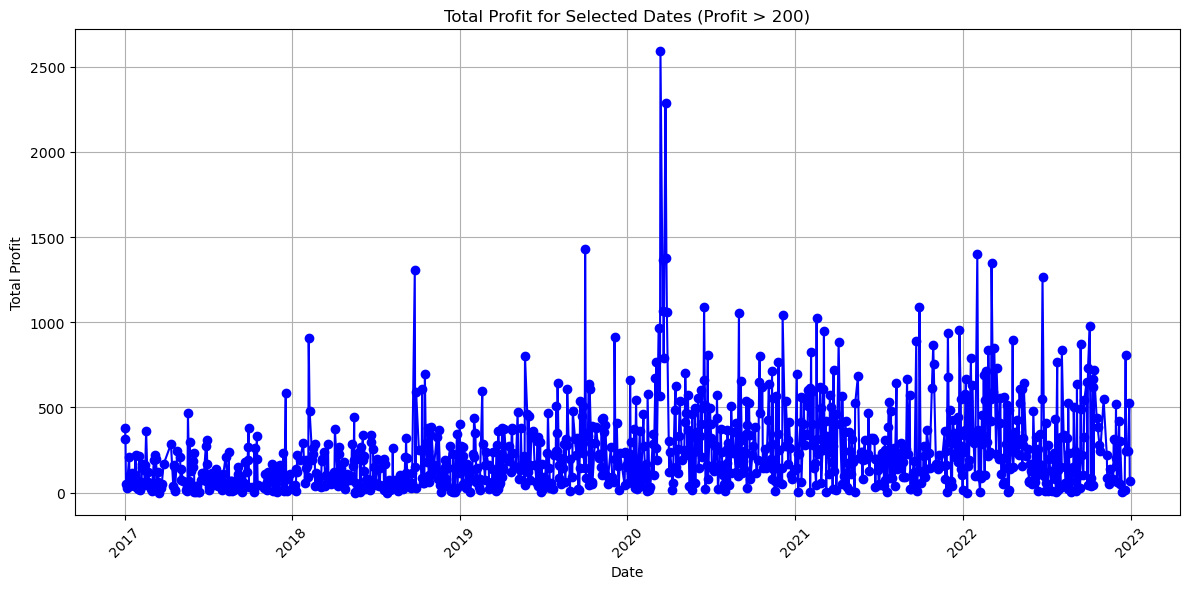

In [15]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(high_profit_dates.index, high_profit_dates['total_profit'], marker='o', linestyle='-', color='b')
plt.title('Total Profit for Selected Dates (Profit > 200)')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Show the plot
plt.show()
